In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [48]:
key = '18b7d05bcd2ebda6cab8959dfcb60b31ea4b0798'
df = pdr.get_data_tiingo('AAPL', api_key = key)

C:\Users\anant\AppData\Local\Temp\ipykernel_18264\82843670.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key = key)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
df = pd.read_csv('AAPL.csv')

In [5]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-09 00:00:00+00:00,190.58,190.68,189.30,189.50,19756634,45.529313,45.553203,45.223522,45.271302,79026536,0.0,1.0
1,AAPL,2018-07-10 00:00:00+00:00,190.35,191.28,190.18,190.71,15939149,45.474366,45.696542,45.433753,45.560370,63756596,0.0,1.0
2,AAPL,2018-07-11 00:00:00+00:00,187.88,189.78,187.61,188.50,18831470,44.884286,45.338194,44.819784,45.032404,75325880,0.0,1.0
3,AAPL,2018-07-12 00:00:00+00:00,191.03,191.41,189.31,189.53,18041131,45.636817,45.727599,45.225911,45.278469,72164524,0.0,1.0
4,AAPL,2018-07-13 00:00:00+00:00,191.33,191.84,190.90,191.08,12519792,45.708487,45.830325,45.605760,45.648762,50079168,0.0,1.0


In [6]:
df1 = df.reset_index()['close']

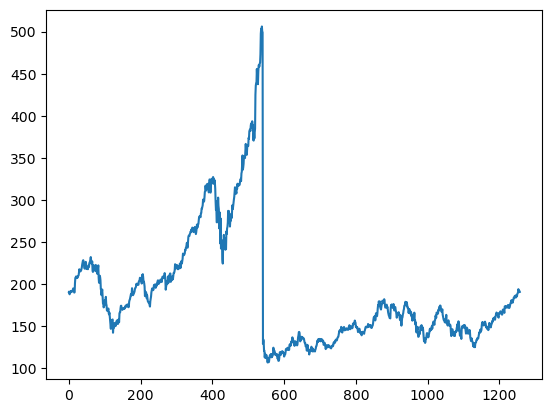

In [7]:
plt.plot(df1)

In [8]:
mov_avg100 = df.close.rolling(100).mean()
mov_avg100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1253    166.33625
1254    166.71435
1255    167.10845
1256    167.51785
1257    167.91455
Name: close, Length: 1258, dtype: float64

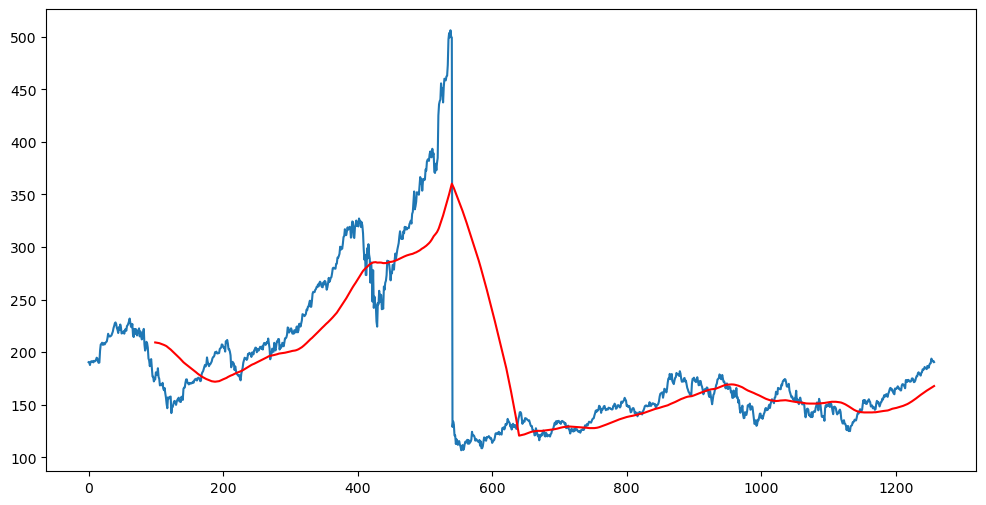

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(mov_avg100, 'r')

In [10]:
mov_avg200 = df.close.rolling(200).mean()
mov_avg200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1253    154.573925
1254    154.759675
1255    154.954475
1256    155.160025
1257    155.341025
Name: close, Length: 1258, dtype: float64

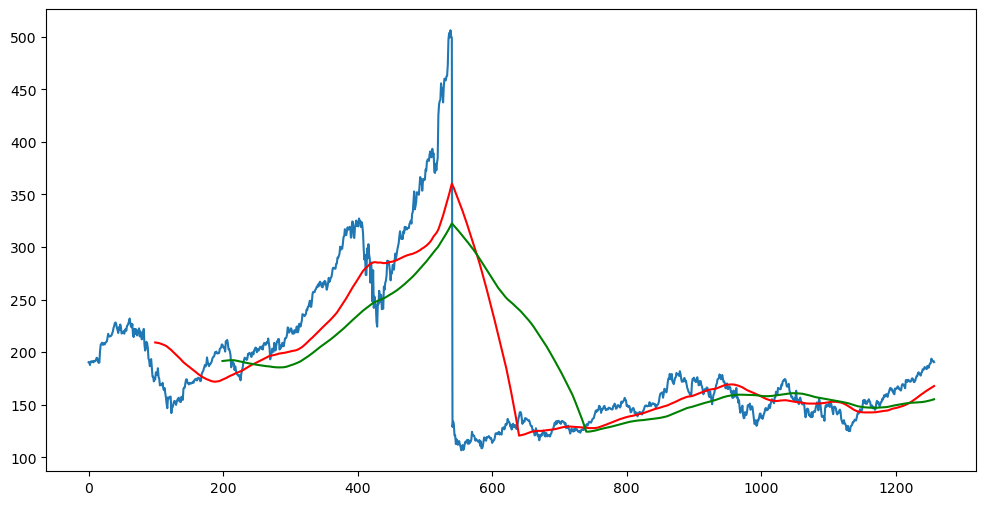

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(mov_avg100, 'r')
plt.plot(mov_avg200, 'g')

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.20974327],
       [0.20916719],
       [0.20298059],
       ...,
       [0.21162179],
       [0.21282405],
       [0.20999374]])

In [13]:
#training & testing
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [14]:
#divifing the dataset into training data and testing data, this helps the machine to learn about the data
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)    

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape)

(716, 100, 1)


In [17]:
#reshape the xtrain into 3 dimensions
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1 )
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
## creating an LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model  = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 326ms/step - loss: 0.0532 - val_loss: 0.0049
Epoch 2/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0157 - val_loss: 0.0036
Epoch 3/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0108 - val_loss: 5.6709e-04
Epoch 4/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0100 - val_loss: 0.0013
Epoch 5/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0087 - val_loss: 3.7800e-04
Epoch 6/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0072 - val_loss: 0.0015
Epoch 7/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0075 - val_loss: 3.2734e-04
Epoch 8/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0056 - val_loss: 2.8911e-04
Epoch 9/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0060 - val_loss: 3.4244e-04
Epoch 10/100
12/12 [==============================] - 3s 217ms/step - 

In [30]:
import tensorflow as tf

In [31]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 27ms/step


In [32]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

223.63208683249118

In [34]:
math.sqrt(mean_squared_error(ytest, test_predict))

155.99159603124812

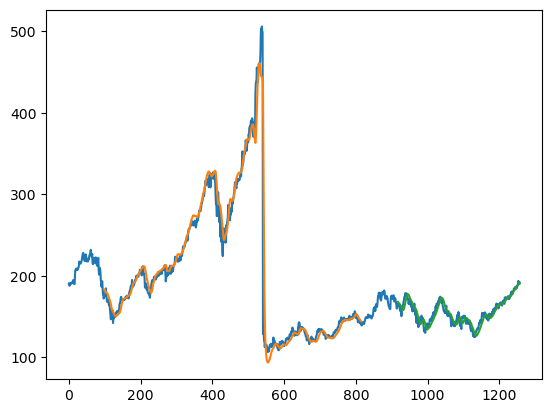

In [36]:
#predict the output and plotting the same
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test prictions
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.NaN
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

441

In [39]:
#test data values for previous 100 days
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [41]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<100):

    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)        

[0.21745569]
101
1 day input [0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211

In [42]:
day_new = np.arange(1,101)
day_pred = np.arange(101,201)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1258

In [45]:
df3 = df1.tolist()
df3.extend(lst_output)

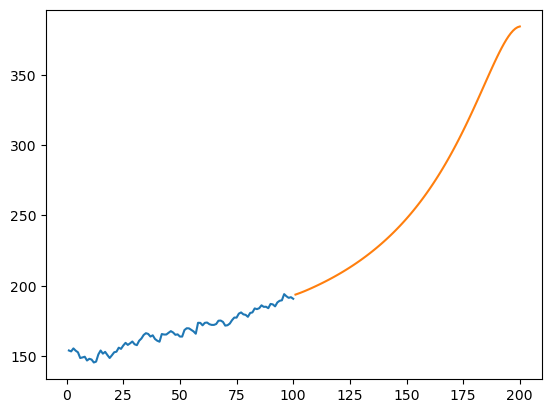

In [46]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))